# Project : 

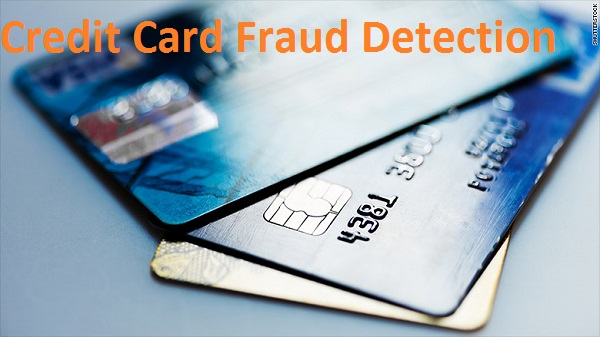

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy 
import sklearn
from sklearn.metrics import classification_report, accuracy_score

# Importing Libraries for Outlier Detection

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression

# Reading the dataset

In [3]:
data = pd.read_csv('creditcard.csv')

In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> The column Class contains two labels 0 and 1 : 
>>0 = Normal case
>>
>>1 = Fraud case


# EDA(Exploratory Data Analysis)

In [5]:
data.shape

(284807, 31)

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Check the distribution of normal and fraud cases in the dataset

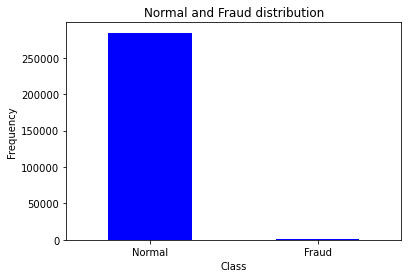

In [7]:
#The count of different variables in different categories
fraud_check = pd.value_counts(data['Class'], sort = True)
fraud_check.plot(kind = 'bar' , rot=0 , color = 'b')
plt.title("Normal and Fraud distribution")
plt.xlabel('Class')
plt.ylabel('Frequency')

#Replacing the label 0 and 1 with ['normal', 'fraud']

labels = ['Normal' , 'Fraud']
plt.xticks(range(2), labels)
plt.show()

### Shape of Normal and Fraud data

In [8]:
fraud = data[data['Class'] == 1]
normal = data[data["Class"] == 0]

In [9]:
fraud.shape

(492, 31)

In [10]:
normal.shape

(284315, 31)

In [11]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Plot the distribution in details

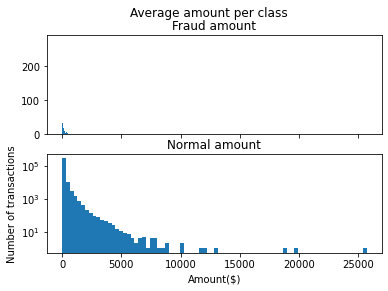

In [13]:
graph,(plot1,plot2) = plt.subplots(2,1 , sharex = True)
graph.suptitle('Average amount per class')
bins = 80

plot1.hist(fraud['Amount'], bins = bins)
plot1.set_title('Fraud amount')

plot2.hist(normal['Amount'], bins = bins)
plot2.set_title('Normal amount')

plt.xlabel('Amount($)')
plt.ylabel('Number of transactions')
plt.yscale('log')
plt.show()



# Plot the correlation between variables

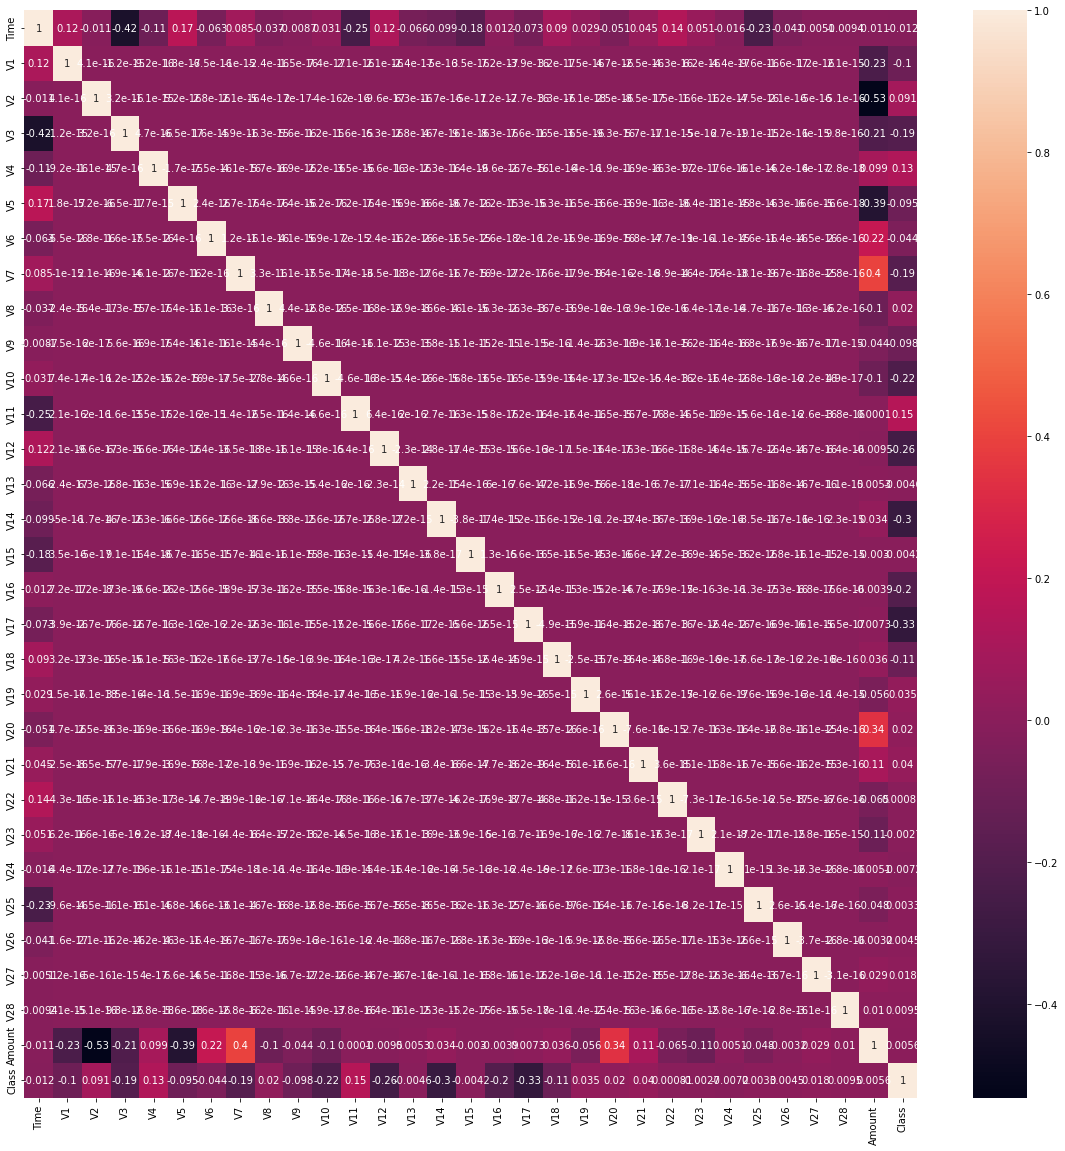

In [14]:
data.corr()
plt.figure(figsize=(20,20))
g = sns.heatmap(data.corr() , annot = True)

>> Based on the correlation between different variables we can divise the dataset into Independent and Dependent variables

# Creating Dependent and Independent Features 

In [15]:
#Convert the columns in the dataset to a list of columns
columns = data.columns.tolist()

#Independent features
columns = [variable for variable in columns if variable not in ['Class']]
X = data[columns]

#Dependent variable
target = 'Class'
y = data[target]

In [16]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [17]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

# Model Building

#### 1- Spliting the data into training and testing datasets

In [18]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.3 , random_state = 42)

#### 2- models : 
># - Isolation Forest:
>> The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.
># - Logistic Regression
>> Supervised model for classification


In [19]:
iso_forest = IsolationForest(n_estimators=100 , max_samples=len(X_train), random_state=0, verbose = 0)

#### 3- Trainig the model

In [20]:
iso_forest.fit(X_train , y_train)

IsolationForest(max_samples=199364, random_state=0)

#### 4- predict target for test set

In [21]:
y_pred = iso_forest.predict(X_test)

In [22]:
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

>> -1 means it is an outlier(normal)
>
>>  1 means a fraud case

In [23]:
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1

#### 5- Accuracy score calculation

In [24]:
print(accuracy_score(y_test , y_pred))

0.9978465175614152


> The model gives a high accuracy which is a good result

In [25]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[85189   118]
 [   66    70]]


>> 85189 predictions are true and positive(normal)
>
>> 70 predictions are true and negative(fraud)


#### 6- how many errors the model did

In [27]:
errors = (y_pred != y_test).sum()
print("Isolation Forest have {} errors ".format(errors))

Isolation Forest have 184 errors 


#### 7-repeat the same steps for the second model  : 
># Logistic Regression


In [29]:
lg = LogisticRegression()

In [30]:
lg.fit(X_train,y_train)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_pred1= lg.predict(X_test)

In [32]:
y_pred1[y_pred1 == 1] = 0
y_pred1[y_pred1 == -1] = 1

In [33]:
print(accuracy_score(y_test,y_pred1))

0.9984082955888721


In [34]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.metrics import confusion_matrix

n_errors = (y_pred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

SVM have 136 errors.


# Solving the Problem Statement using PyCaret Library(Auto Machine Learning)

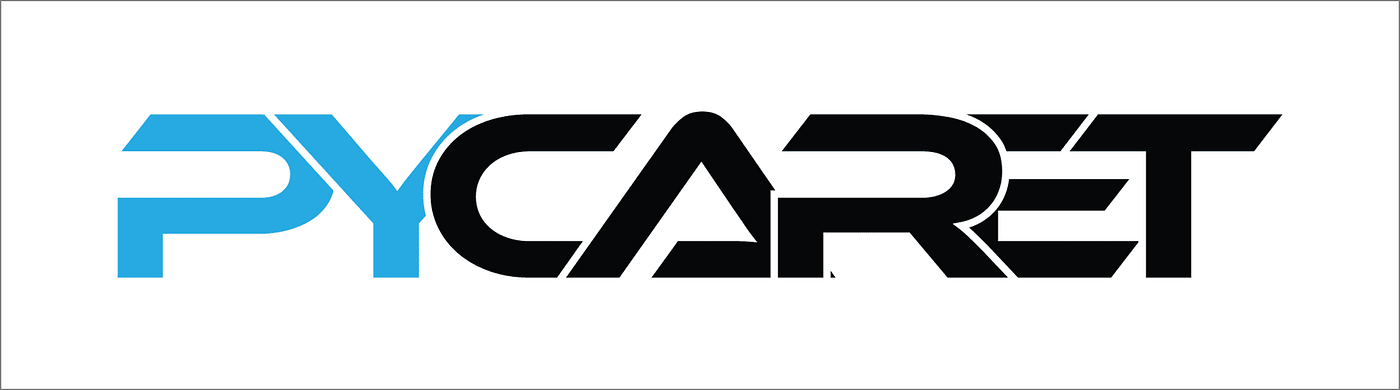

In [28]:
pip install pycaret

In [29]:
data= pd.read_csv("creditcard.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Classification with pycaret

In [30]:
from pycaret.classification import *

In [31]:
model = setup(data = data , target = 'Class')

,Description,Value
0,Session id,4145
1,Target,Class
2,Target type,Binary
3,Original data shape,"(284807, 31)"
4,Transformed data shape,"(284807, 31)"
5,Transformed train set shape,"(199364, 31)"
6,Transformed test set shape,"(85443, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


## Return the best model

In [ ]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:44:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9992,0.8821,0.7646,0.7840,0.7711,0.7707,0.7723,6.1720
lr,Logistic Regression,0.9991,0.9422,0.6109,0.8265,0.6971,0.6966,0.7073,8.3680
ridge,Ridge Classifier,0.9988,0.0000,0.4101,0.8327,0.5454,0.5449,0.5814,0.6260
svm,SVM - Linear Kernel,0.9982,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0003,10.2530
nb,Naive Bayes,0.9925,0.9687,0.6397,0.1382,0.2272,0.2250,0.2949,0.5470


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

### Choosing the Random Forest model

In [42]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9995,0.9409,0.8000,0.9333,0.8615,0.8613,0.8639
1,0.9996,0.9998,0.8000,1.0000,0.8889,0.8887,0.8943
2,0.9997,0.9414,0.8571,1.0000,0.9231,0.9230,0.9257
3,0.9994,0.8973,0.6857,0.9600,0.8000,0.7997,0.8111
4,0.9997,0.9698,0.8529,1.0000,0.9206,0.9205,0.9234
5,0.9994,0.9244,0.7059,0.9231,0.8000,0.7997,0.8069
6,0.9995,0.9546,0.8235,0.8750,0.8485,0.8482,0.8486
7,0.9993,0.9245,0.7059,0.8571,0.7742,0.7738,0.7775
8,0.9996,0.9693,0.8529,0.9062,0.8788,0.8786,0.8790


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1938, verbose=0, warm_start=False)

## Tuning the model

In [ ]:
tuned_model = tune_model(random_forest)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:30:01
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## Predictions

In [ ]:
pred_holdout = predict_model(random_forest , data = X_test)

In [ ]:
pred_holdout

>#### Tha column "label" is added it contains two labels 0 for normal transactions and 1 for fraud transactions